               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


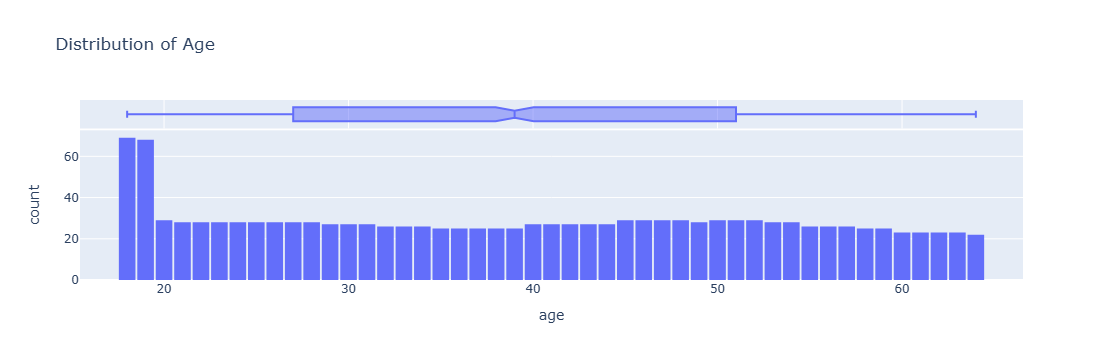

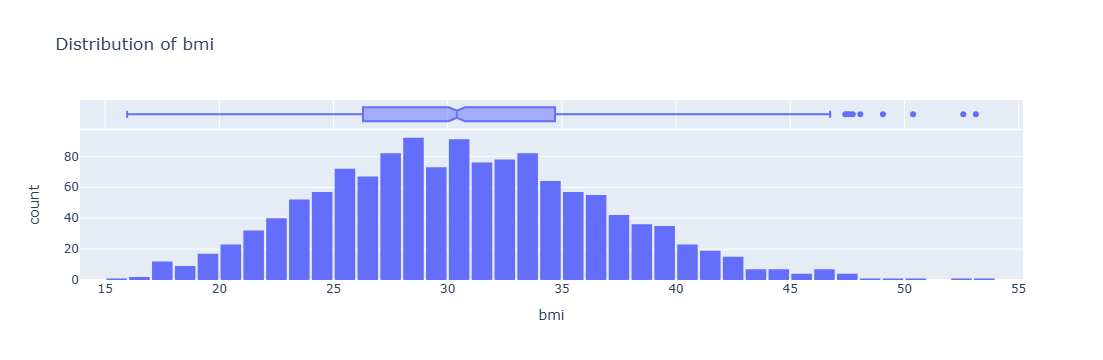

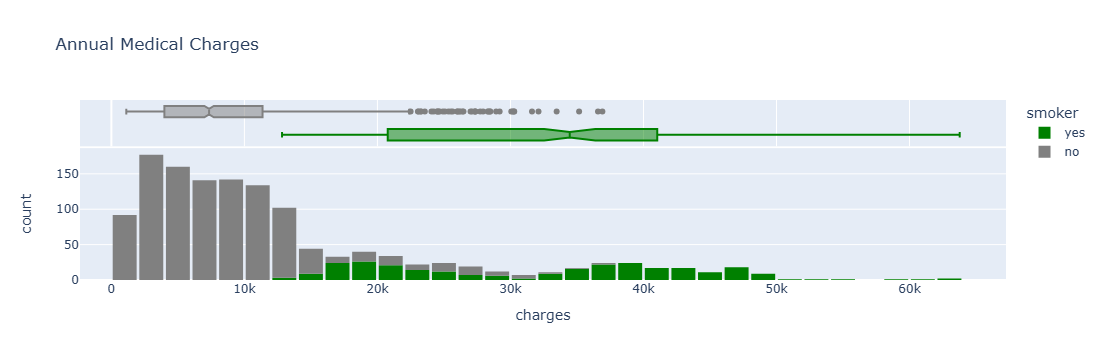

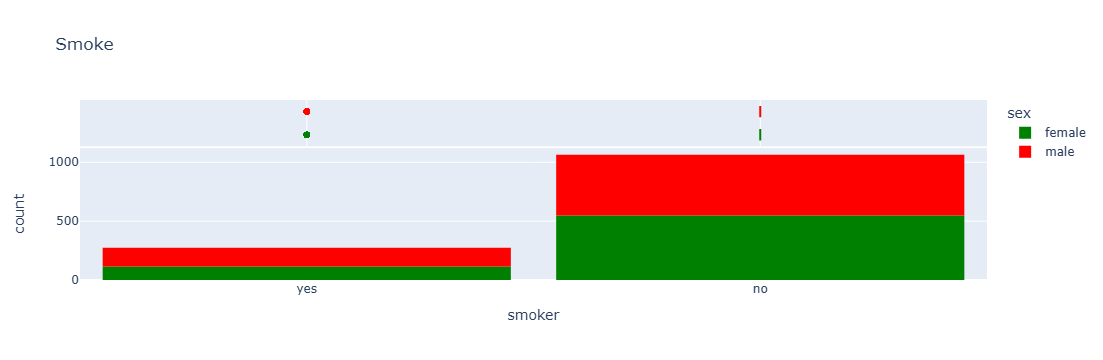

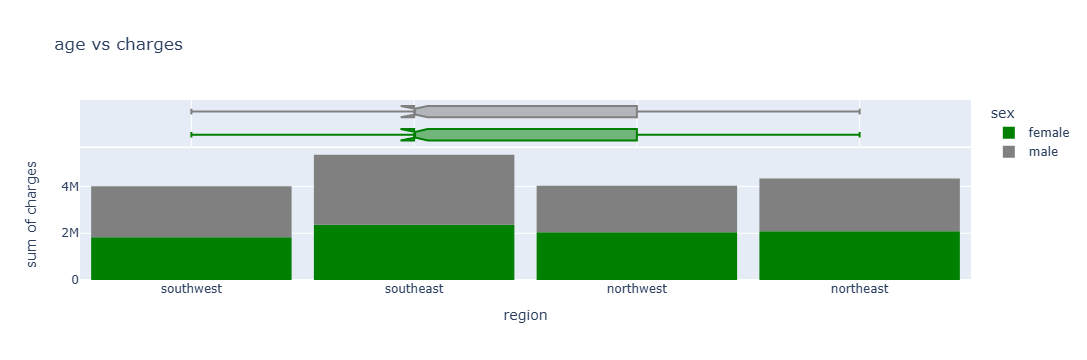

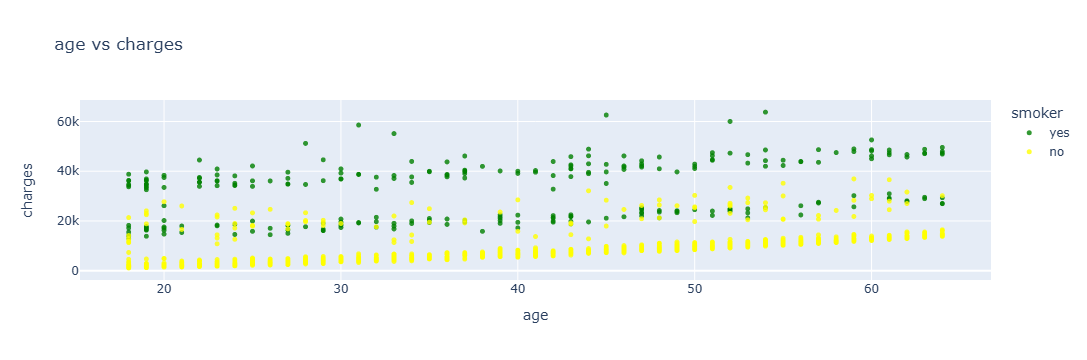

[6137.19385382]


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



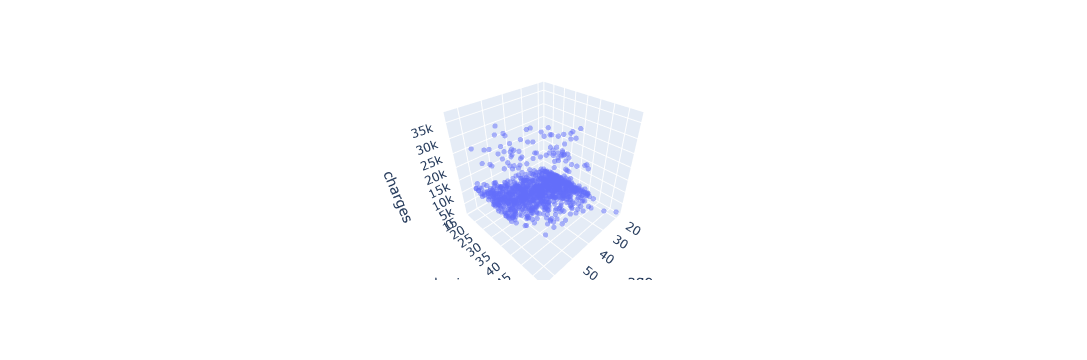

[71906.77595662]
[23738.33927927]
[17371.5210282]


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

C:\Users\Acer\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\Acer\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [21]:


from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(medical_charges_url,"medical.csv")

medical_df=pd.read_csv("medical.csv")

print(medical_df.describe())


#Age distribution
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

#body mass Index
fig1 = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of bmi')
fig1.update_layout(bargap=0.1)
fig1.show()

#charges distribution over smoker and non smoker
fig2 = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig2.update_layout(bargap=0.1)
fig2.show()
#Smoking distribution over gender
fig3 = px.histogram(medical_df, 
                   x='smoker', 
                    color='sex',
                   marginal='box', 
                   color_discrete_sequence=['green','red'], 
                   title='Smoke')
fig3.update_layout(bargap=0.1)
fig3.show()
#sum of charges distribution over regions
fig4 =px.histogram(medical_df,
                 x='region', 
                 y='charges',
                 color='sex',
                 marginal='box',
                 color_discrete_sequence=['green','grey'], 
                 title='age vs charges')
fig4.update_layout(bargap=0.1)
fig4.show()
#charges distribution over age
fig5 =px.scatter(medical_df,
                 x='age', 
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 color_discrete_sequence=['green','yellow'], 
                 title='age vs charges')
fig5.update_traces(marker_size=5)
fig5.show()

#prediction over non-smoker
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)
non_smoker_df = medical_df[medical_df.smoker == 'no']

inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']
# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions_nonsmoker = model.predict([[30,60]])
print(predictions_nonsmoker)

#3d model for multi linear regression
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()


#prediction for smoker
smoker_df = medical_df[medical_df.smoker == 'yes']
inputs, targets = smoker_df[['age','bmi']], smoker_df['charges']
# Create and train the model
model = LinearRegression().fit(inputs, targets)
# Generate predictions
predictions_smoker = model.predict([[30,60]])
print(predictions_smoker)

#prediction for male and female:

gender_values = {'male': 0, 'female': 1}
gender_numeric = medical_df.sex.map(gender_values)
medical_df.charges.corr(gender_numeric)
gender_df = medical_df[medical_df.sex == 'male']


input,target=gender_df[['age','bmi']],gender_df['charges']

model = LinearRegression().fit(input, target)
predictions_male = model.predict([[30,60]])
print(predictions_male)


gender_values = {'female': 0, 'female': 1}
gender_numeric = medical_df.sex.map(gender_values)
medical_df.charges.corr(gender_numeric)
gender_df = medical_df[medical_df.sex == 'female']


input,target=gender_df[['age','bmi']],gender_df['charges']

model = LinearRegression().fit(input, target)
predictions_female = model.predict([[30,60]])
print(predictions_female)








